# **Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Loading the data**

In [ ]:
df = pd.read_csv('data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#Checking the first few entries
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Description of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


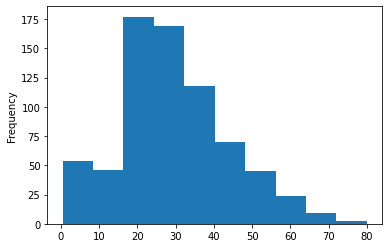

In [ ]:
df.Age.plot(kind='hist')

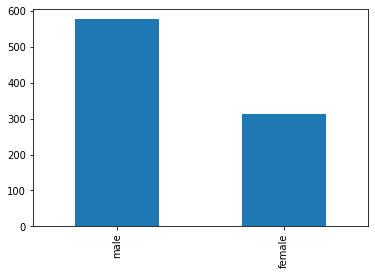

In [ ]:
df['Sex'].value_counts().plot.bar()

In [ ]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Outlier Treatment**

Text(0, 0.5, 'Fare')

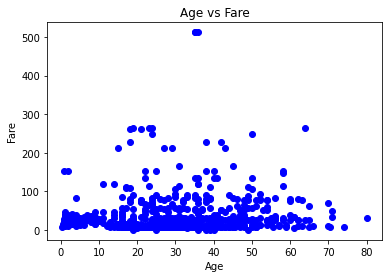

In [ ]:
plt.scatter(df.Age,df['Fare'], color='blue', marker='o')
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")

Text(0, 0.5, 'Fare')

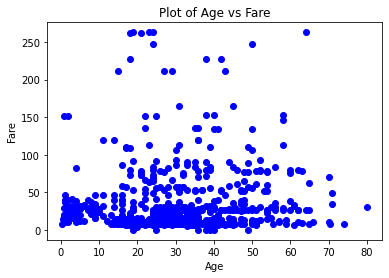

In [ ]:
df = df[df['Fare']<300]

#Checking if Outlier are removed
plt.scatter(df.Age,df['Fare'], color='blue', marker='o')
plt.title("Plot of Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")

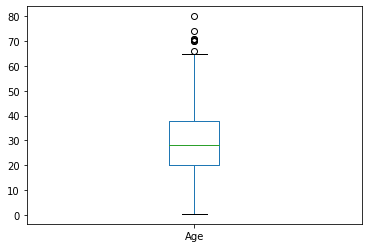

In [ ]:
df['Age'].plot.box()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


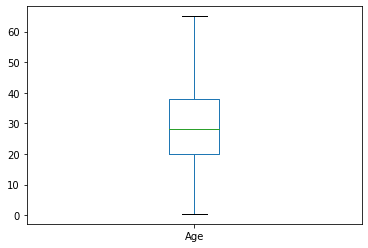

In [ ]:
df.loc[df['Age']>65, 'Age'] = np.mean(df['Age'])
#Checking if Outlier are removed
df['Age'].plot.box()

# **Filling the missing values**

In [ ]:
mean= df['Age'].mean()
df['Age'].fillna(value = mean, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
#Since a lot of values in cabin is missing, we will remove it along with other unwanted data
df.drop(columns = ['PassengerId','Cabin', 'Name','Ticket','Fare', 'PassengerId'],axis = 1, inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Creating dummy Variables

embark = pd.get_dummies(df['Embarked']).rename(columns= {'C': 'Embarked_C', 'Q': 'Embarked_Q', 'S': 'Embarked_S'})
parch = pd.get_dummies(df['Parch']).rename(columns= {0:'Parch_0', 1:'Parch_1',2:'Parch_2', 3:'Parch_3', 4:'Parch_4', 5:'Parch_5',6:'Parch_6'})
pclass = pd.get_dummies(df['Pclass']).rename(columns= {0:'Pclass_0', 1:'Pclass_1',2:'Pclass_2', 3:'Pclass_3'})
sibsp = pd.get_dummies(df['SibSp']).rename(columns= {0:'Sibsp_0',1:'Sibsp_1' , 2 :'Sibsp_2',  3 :'Sibsp_3',    4 :'Sibsp_4',   8 :'Sibsp_8',    5:'Sibsp_5' })
sex = pd.get_dummies(df['Sex'])

#Storing all the entries in dummies variable
dummies = pd.concat([sex,embark,parch,pclass,sibsp], axis=1)

#Concating the dataframe
df=pd.concat((df,dummies), axis=1)

#Deleting the categorical columns
df.drop(columns = ['Pclass','Sex', 'SibSp','Parch','Embarked'],axis = 1, inplace=True)


In [ ]:
#Exporting data into a new CSV File 
df.to_csv("Clean_data.csv",index=False)

# **Reading the data from the new Dataset**

In [ ]:
data = pd.read_csv("Clean_data.csv")

In [ ]:
#Segregation of the independent and dependent variables
X= data.drop('Survived',axis = 1)
y= data['Survived']

# **Scaling the data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
scalar= mm.fit_transform(X)

In [ ]:
x= pd.DataFrame(scalar, columns=X.columns)

# **Splitting the data**

In [ ]:

from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x,y, random_state=40) 

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




In [ ]:
#Fitting the model
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predicting the values
y_pred=knn.predict(x_test)


print("Accuracy of the model is : " ,(accuracy_score(y_pred, y_test)*100).round(2), "%")
print('')
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))




Accuracy of the model is :  82.88 %

Confusion Matrix :
[[122  21]
 [ 17  62]]


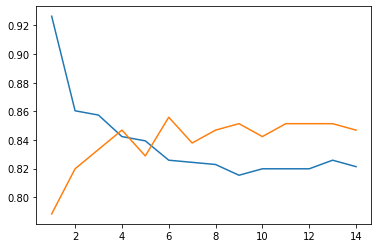

In [ ]:
#Comparing all the possibilities of k values
   
tra = []
tsa = []
for i in range(1,15):
  km = KNeighborsClassifier(n_neighbors=i)
  km.fit(x_train,y_train)
  tra.append(km.score(x_train,y_train))
  tsa.append(km.score(x_test,y_test))
plt.plot(range(1,15),tra)
plt.plot(range(1,15),tsa)
plt.show()
